<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Unit 3 Project: Supervised Learning

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
%matplotlib inline

In this project, you will practice the core skill of this course: supervised learning with passively collected, tabular, cross-sectional data. We will start with a regression problem, and then address a classification problem.

## Regression

In [4]:
# Load the dataset
noise = pd.read_csv(
    'data/airfoil_self_noise.dat',
    delimiter='\t',
    names=['frequency',
           'angle',
           'chord_length',
           'free_stream_velocity',
           'displacement_thickness',
           'self_noise',
          ]
)

- Read about this dataset [here](https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise). Write a short paragraph describing this dataset in your own words. How could a model for this dataset be useful?

The dataset is a a collection of observations of the noise produced by airfoils in a wind tunnel.  The dataset provides a set of input parameters and the measured output.  This could be useful and producing an airfoil that produces mininmal noise.

- Find out how many rows and columns are in `noise`.

In [5]:
noise.shape ## this tells me that there are 6 columns and 1503 rows

(1503, 6)

- Find out what data types are present.

In [6]:
noise.dtypes ## this tells me that all of the column are either whole numbers or decimals

frequency                   int64
angle                     float64
chord_length              float64
free_stream_velocity      float64
displacement_thickness    float64
self_noise                float64
dtype: object

- Find out how many null values there are in each columns.

In [13]:
noise.isnull().sum() ## this tells me that there are no null values

frequency                 0
angle                     0
chord_length              0
free_stream_velocity      0
displacement_thickness    0
self_noise                0
dtype: int64

- Check basic summary statistics for each column, including at least one measure of central tendency and one measure of dispersion.

In [14]:
noise.describe() ## this provides the summary statistics of the data set

,frequency,angle,chord_length,free_stream_velocity,displacement_thickness,self_noise
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


- Plot of the distribution of each column, e.g. with some combination of histograms, bar plots, and box plots.

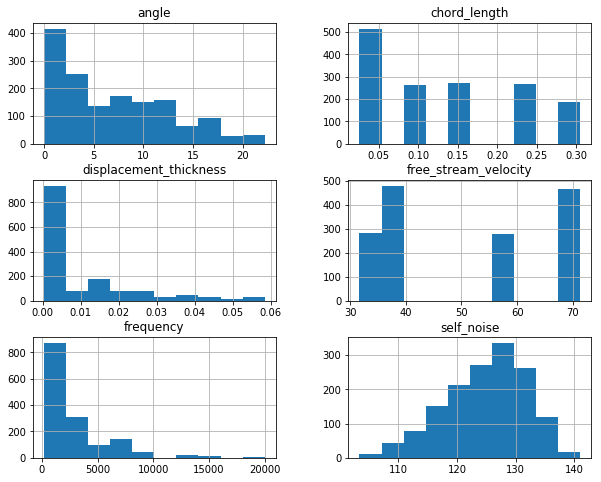

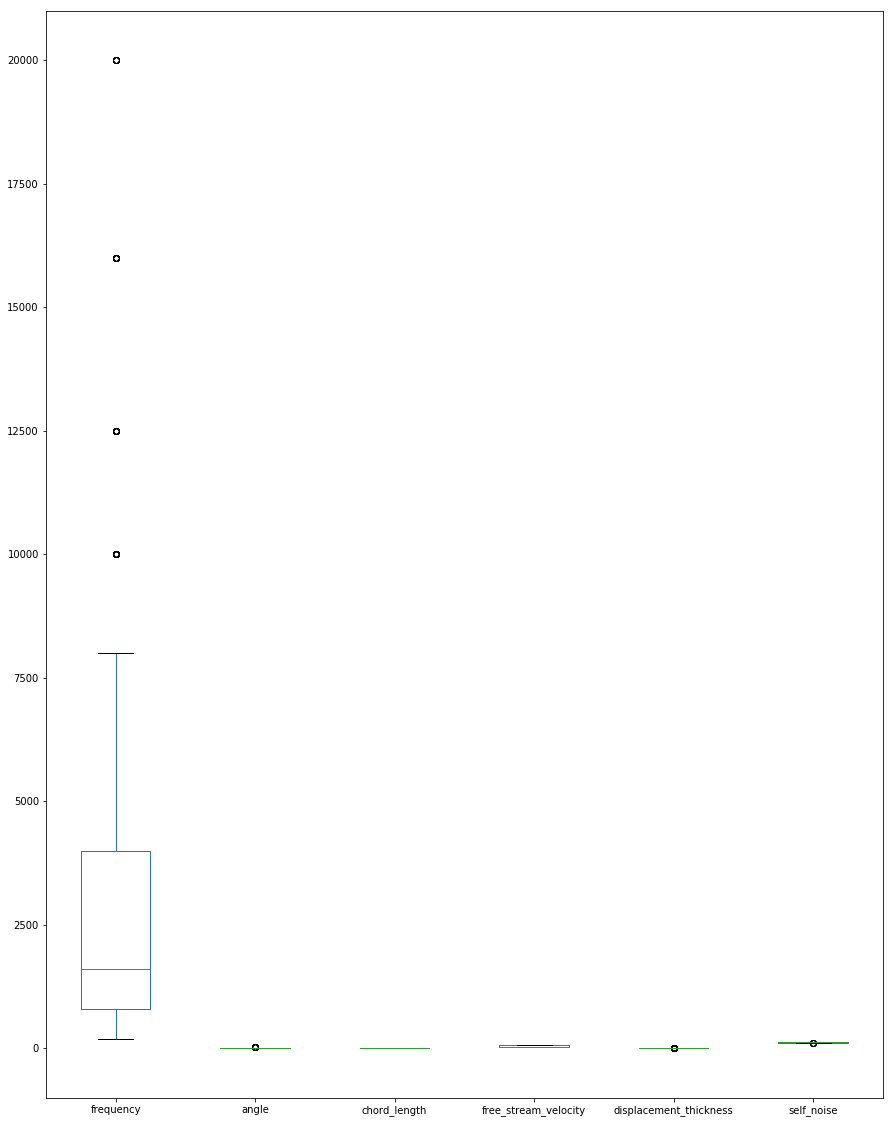

In [37]:
ax = noise.hist(figsize=(10,8))  ## plots histograms of the data
ax1 = noise.plot(kind='box', figsize=(15, 20)) ## plots boxplots of the data

- Which variables are approximately normally distributed?

self_noise, displacement_thickness, and free_stream_velocity show fairly normal distribution, self_noise more so than the other two

- Which variables show strong skew?

frequency and displacement_thickness are strongly skewed.  angle is also skewed but not as strongly.

- Make a scatterplot of each feature variable with the target variable "self_noise".

In [26]:
import seaborn as sns

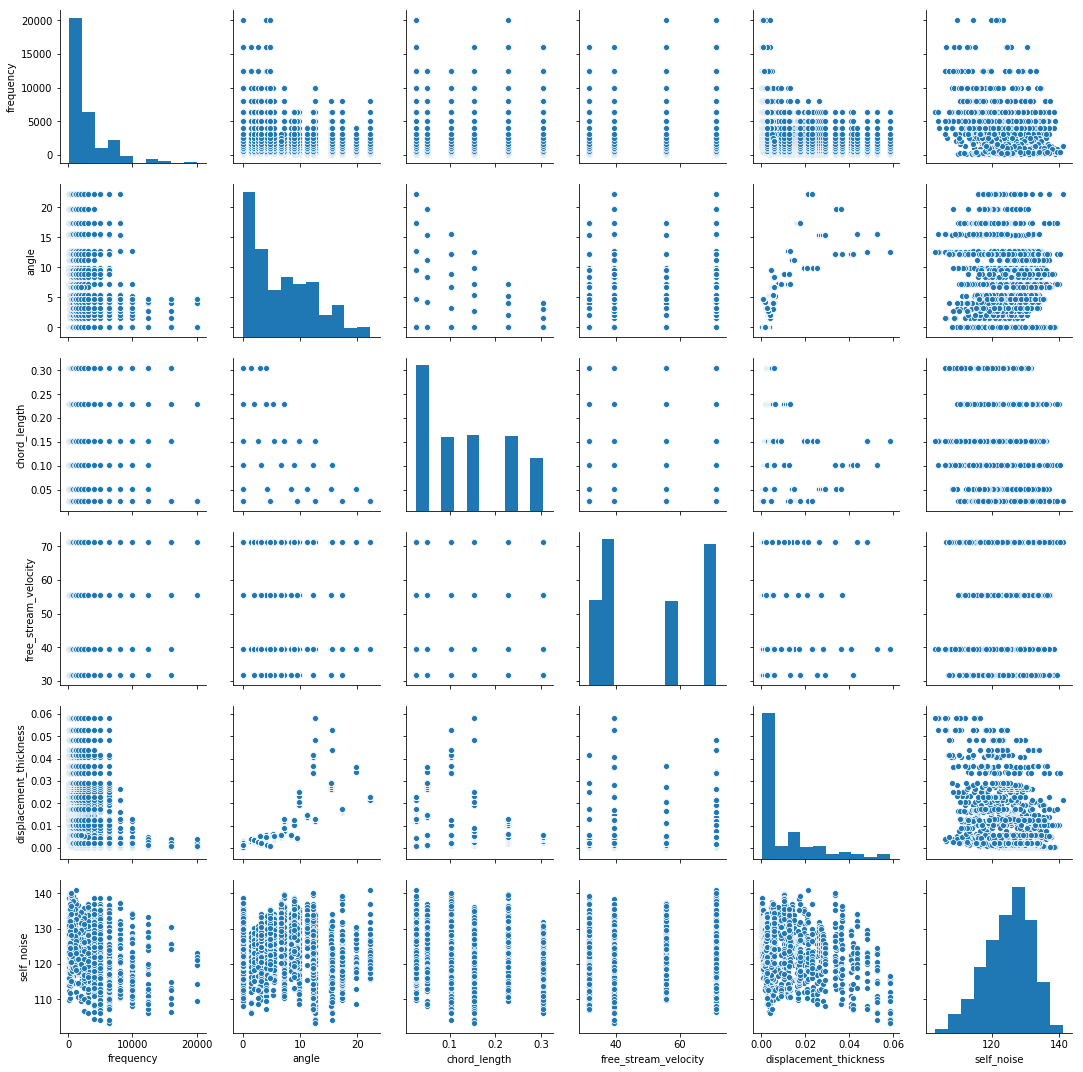

In [29]:
axes = sns.pairplot(noise)

- Make a heatmap of the correlation matrix for this dataset. Be sure to use an appropriate colormap!

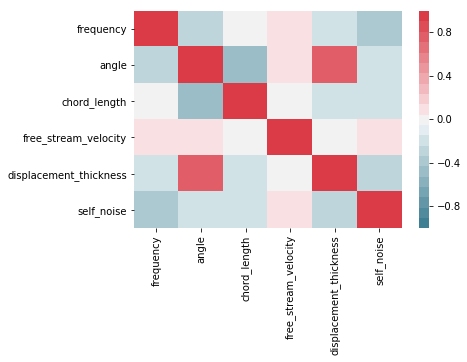

In [30]:
ax=sns.heatmap(noise.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(220, 10, n=21)
           )

- What do you notice about this dataset that will make a difference to how you model it? Feel free to do additional EDA at this point.

While there is quite a bit of negative correlation to self_noise, the data doesn't appear to have strong linear relationships.

- Develop a linear regression model to predict the target variable "self_noise". Train it on 70% of the data. Gets its R^2 score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

y = noise.loc[:, 'self_noise']
X = noise.drop('self_noise', axis='columns')

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, test_size=.3, random_state=15)

lr = LinearRegression()

lr.fit(X_train, y_train)

print('Training R-Squared:', lr.score(X_train, y_train))
print('Test R-Squared:', lr.score(X_test, y_test))  

Training R-Squared: 0.528971901712307
Test R-Squared: 0.48329451037941845


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

The model is working, but it did not perform that well.  The result of the model would indicate high bias.

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

The model performed similarly on the training and test sets.  Normally that would indicate there is low variance.

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

The model definitely has a bias problem because the the the model is underfitting.

- Develop a random forest model with 100 or more trees to predict the target variable. Train it on 70% of the data. Gets its R^2 score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [42]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(X_train, y_train)
print(rfr.score(X_train, y_train))
print(rfr.score(X_test, y_test))

0.9890812071859526
0.9191123899217503


- Compare the bias, variance, and overall predictive performance of your random forest model to that of your linear regression model.

- Find a way to get a better score from either linear regression or a random forest. Make notes about what you are trying and why.

- **BONUS:** Keep going! Find ways to make your model better.

## Classification

- Read about this dataset [here](https://archive.ics.uci.edu/ml/datasets/Credit+Approval). Write a short paragraph describing this dataset in your own words. How could a model for this dataset be useful?

In [97]:
# Load the dataset
credit = pd.read_csv(
    'data/crx.data',
    names=range(1, 17)
)

- Find out how many rows and columns are in `credit`.

In [103]:
credit.shape

(690, 16)

- Find out what data types are present.

In [104]:
credit.dtypes

1      object
2      object
3     float64
4      object
5      object
6      object
7      object
8     float64
9      object
10     object
11      int64
12     object
13     object
14     object
15      int64
16     object
dtype: object

- Columns 2 and 14 are "object" but are listed as "continuous" in the dataset description. Tranform these columns to have the appropriate data type. You will need to deal with the special character "?"

In [105]:
credit.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [106]:
credit = credit.add_prefix('A_') ## trying modify the column with label 2 or 14 was erroring

In [107]:
credit['A_2'] = credit.A_2.replace('?', 0).astype(float) ## replaces unknown value with 0 and changes to float

In [108]:
credit['A_14'] = credit.A_14.replace('?', 0).astype(int) ## replaces unknown value with 0 and changes to int

In [110]:
credit.head()

,A_1,A_2,A_3,A_4,A_5,A_6,A_7,A_8,A_9,A_10,A_11,A_12,A_13,A_14,A_15,A_16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+


- Find out how many null values there are in each columns.

In [111]:
credit.isnull().sum()

A_1     0
A_2     0
A_3     0
A_4     0
A_5     0
A_6     0
A_7     0
A_8     0
A_9     0
A_10    0
A_11    0
A_12    0
A_13    0
A_14    0
A_15    0
A_16    0
dtype: int64

- Check basic summary information for each column, including categorical columns.

In [112]:
credit.describe()

,A_2,A_3,A_8,A_11,A_14,A_15
count,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000
mean,31.019159,4.758725,2.223406,2.40000,180.547826,1017.385507
std,12.552078,4.978163,3.346513,4.86294,173.970323,5210.102598
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.440000,1.000000,0.165000,0.00000,60.000000,0.000000
50%,28.170000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,37.707500,7.207500,2.625000,3.00000,272.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


In [113]:
credit.describe(include='object')

,A_1,A_4,A_5,A_6,A_7,A_9,A_10,A_12,A_13,A_16
count,690,690,690,690,690,690,690,690,690,690
unique,3,4,4,15,10,2,2,2,3,2
top,b,u,g,c,v,t,f,f,g,-
freq,468,519,519,137,399,361,395,374,625,383


- Plot of the distribution of each column, e.g. with some combination of histograms, bar plots, and box plots.

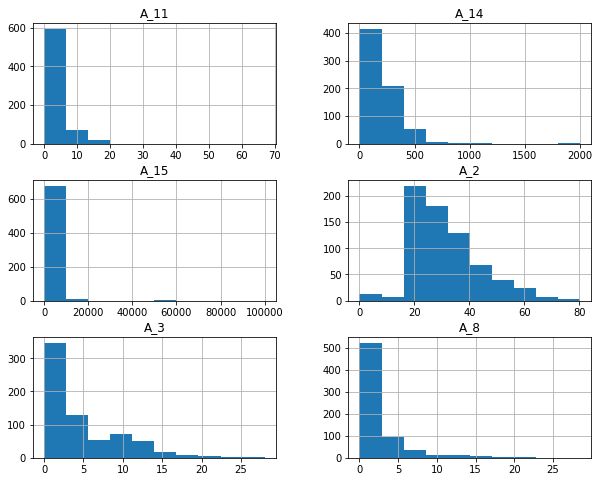

In [114]:
ax = credit.hist(figsize=(10,8))  ## plots histograms of the data

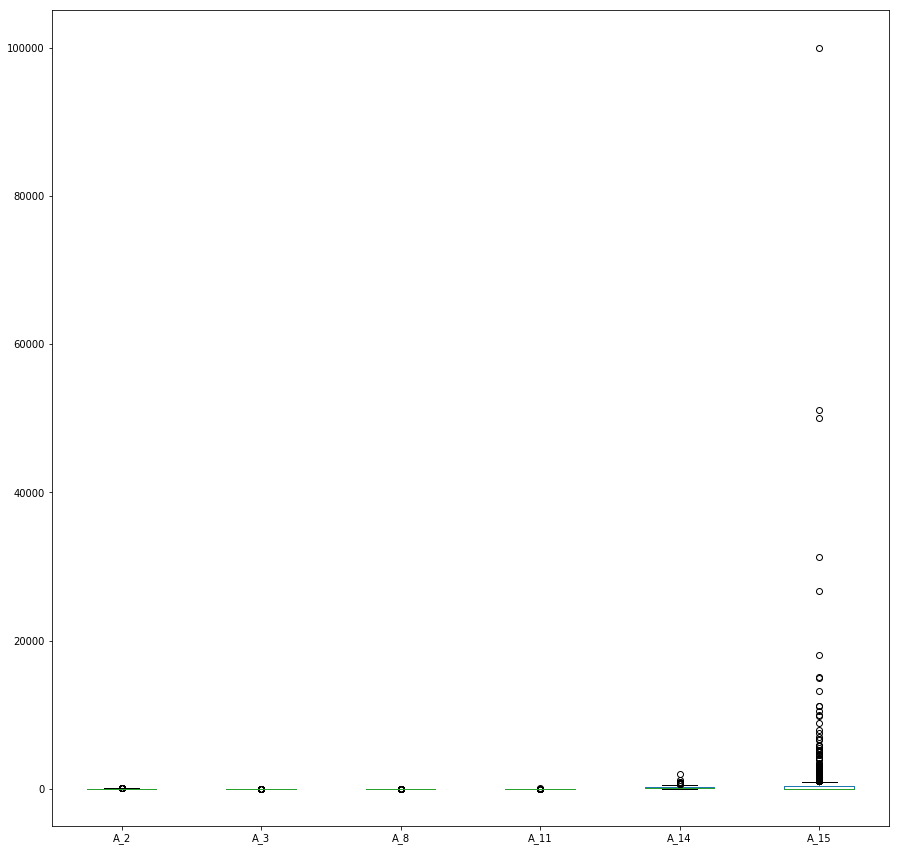

In [117]:
ax = credit.plot(kind='box', figsize=(15, 15)) ## plots boxplots of the data

- Which variables are approximately normally distributed?

Only A_2 appears normally distributed but even it is skewed somewhat to the right

- Which variables show strong skew?

The other variables all show a strong skew to the right.

- Make a scatterplot of each feature variable with the target variable (`16`).

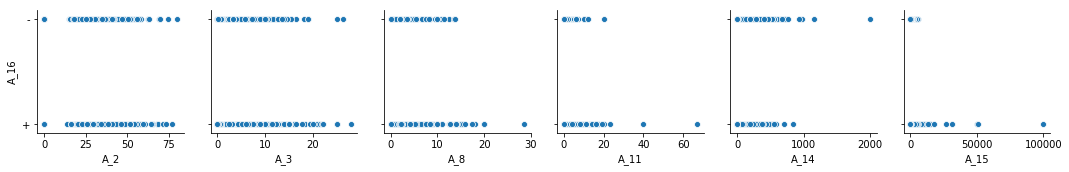

In [128]:
axes = sns.pairplot(credit, x_vars=['A_2', 'A_3', 'A_8', 'A_11', 'A_14', 'A_15'], y_vars='A_16')

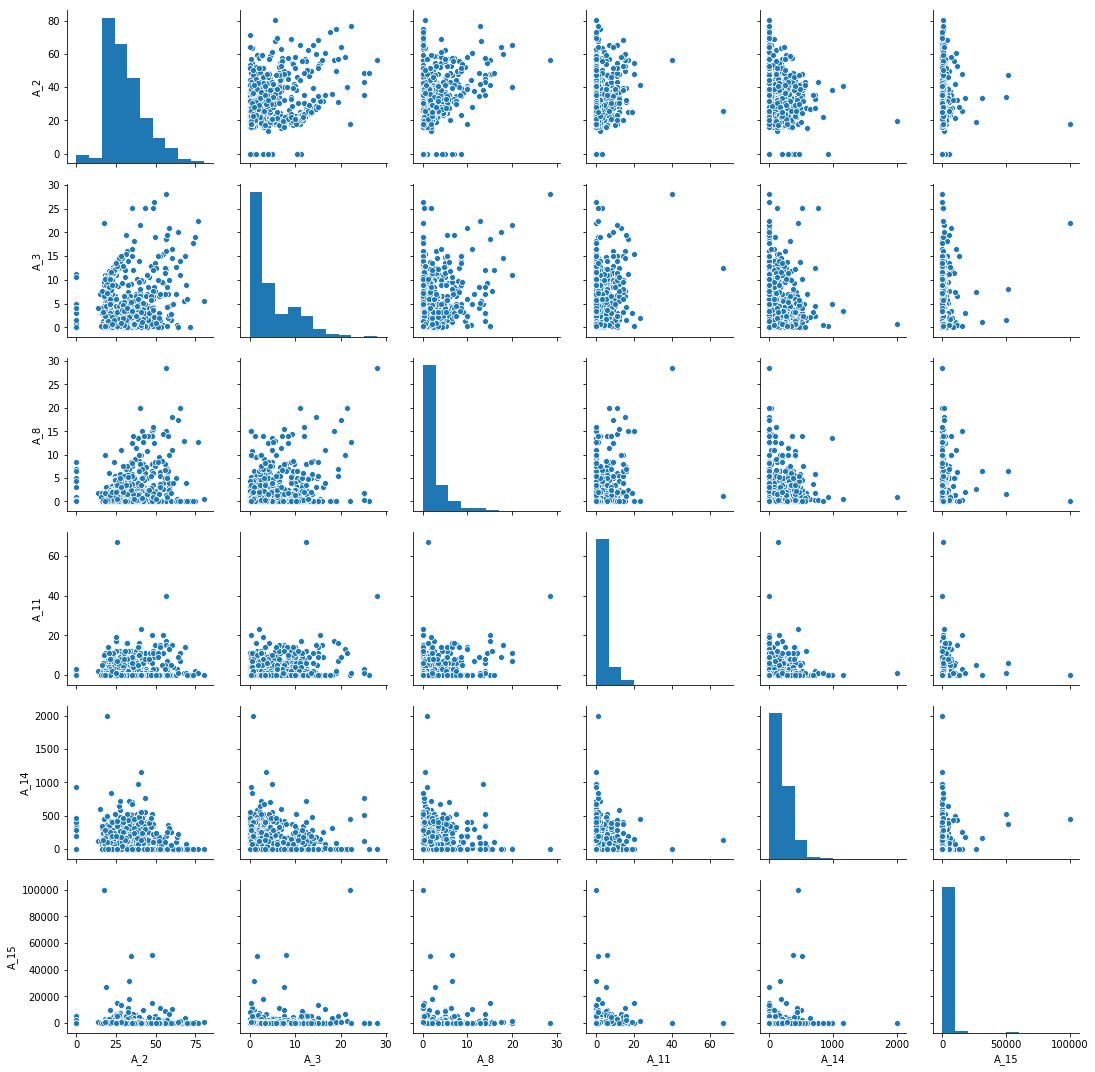

In [132]:
axes = sns.pairplot(credit)

- Make a heatmap of the correlation matrix for numeric variables in this dataset. Be sure to use an appropriate colormap!

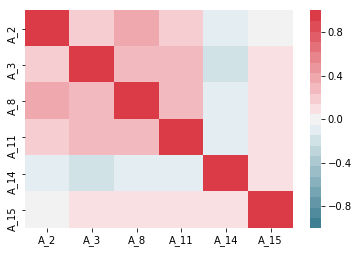

In [129]:
ax=sns.heatmap(credit.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(220, 10, n=21)
           )

- What do you notice about this dataset that will make a difference to how you model it? Feel free to do additional EDA at this point.

The numeric data doens't appear to have either strong positive or negative correlations and the values are visually clustered.  

- What is the accuracy of a null model that just predicts the most common outcome each time on this dataset?

In [131]:
credit.loc[:, 'A_16'].value_counts(normalize=True)  ## 55.5% 

-    0.555072
+    0.444928
Name: A_16, dtype: float64

- Develop a logistic regression model to predict the target variable `16`. Train it on 70% of the data. Gets its accuracy score on both that 70% and the other 30%. Use dummy-coding on categorical columns. Otherwise, at this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [133]:
credit = pd.get_dummies(credit, columns=['A_1', 'A_4', 'A_5', 'A_6', 'A_7', 'A_9', 'A_10', 'A_12', 'A_13'], drop_first=True)

In [138]:
y = credit.loc[:, 'A_16']
X = credit.drop('A_16', axis='columns')

In [139]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, test_size=.3, random_state=15)

lr = LogisticRegression()

lr.fit(X_train, y_train)

print('Training Accuracy:', lr.score(X_train, y_train))
print('Test Accuracy:', lr.score(X_test, y_test))  

Training Accuracy: 0.8775933609958506
Test Accuracy: 0.8502415458937198


C:\Users\jim44\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [140]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, test_size=.3, random_state=39)

lr = LogisticRegression()

lr.fit(X_train, y_train)

print('Training Accuracy:', lr.score(X_train, y_train))
print('Test Accuracy:', lr.score(X_test, y_test)) 

Training Accuracy: 0.8775933609958506
Test Accuracy: 0.8647342995169082


C:\Users\jim44\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [141]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, test_size=.3, random_state=57)

lr = LogisticRegression()

lr.fit(X_train, y_train)

print('Training Accuracy:', lr.score(X_train, y_train))
print('Test Accuracy:', lr.score(X_test, y_test)) 

Training Accuracy: 0.8838174273858921
Test Accuracy: 0.8743961352657005


C:\Users\jim44\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [142]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, test_size=.3, random_state=2)

lr = LogisticRegression()

lr.fit(X_train, y_train)

print('Training Accuracy:', lr.score(X_train, y_train))
print('Test Accuracy:', lr.score(X_test, y_test)) 

Training Accuracy: 0.8775933609958506
Test Accuracy: 0.8840579710144928


C:\Users\jim44\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

The model performed considerably better than the null model.  This suggests that there is still some bias since the model is wrong more than 10% of the time.

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

The training and test values are not significantly different which suggests the model has low variance.

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

If I had to pick one, the model has a bit of bias problem.  The model is consistently accurate in the high 80s on both scores and the variance is consistenly less than 0.1.  The model is perhaps a bit underfit, but not by much as it is performing quite well for a first run.

- Develop a random forest model with 100 or more trees to predict the target variable. Train it on 70% of the data. Gets its R^2 score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [143]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, oob_score=True)
rfc.fit(X_train, y_train)

print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

1.0
0.8743961352657005


- Compare the bias, variance, and overall predictive performance of your random forest model to that of your linear regression model.

This random forest is overfitting on the training set in comparison to the test set which would indicate it picking up variance in the model because it is too flexible.  The test scores are nearly identical.  Neither model seems to be having a bias issue.

- Find a way to get a better score from either linear regression or a random forest. Make notes about what you are trying and why.

In [166]:
rfc = RandomForestClassifier(n_estimators=30, oob_score=True)
rfc.fit(X_train, y_train)

print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

1.0
0.8840579710144928


- **BONUS:** Keep going! Find ways to make your model better.